In [31]:
%load_ext autoreload
%autoreload 2
from decoder_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
pkl_file = open('CA3_beh_nday1_new.pkl', 'rb')
G_CA3 = pickle.load(pkl_file)
pkl_file.close()

In [3]:
input_type = 'ca3'
#subset_range = (0,14000)# 26000)
v_thresh=0.02
reward_thresh=8
#force_remove= (13910, 14110)
spike_thresh=0
#bin_num=30 
bin_num=20 

In [4]:
session_type=2
#train_range2 = (82, 122)
#test_range2 = (61,81)
#valid_range2 = (135,145 )
train_lap_num=45
test_lap_num=5
valid_lap_num=9
# train_range = (60, 100)
# test_range = (1,59)
# valid_range = (100,109 )
bins_before=6 #How many bins of neural data prior to the output are used for decoding
bins_current=1 #Whether to use concurrent time bin of neural data
bins_after=6 #How many bins of neural data after the output are used for decoding
group_bin=90
bin_num=30

start 36
46
poses 0.006908162107467652 0.6433176858520507
start 36
6
poses 0.007254070212841034 0.643158296409183
start 36
10
poses 0.007233722677230835 0.6429107351398468
start 40
46
poses 0.006704686751365662 0.6429209076658884
start 40
6
poses 0.0079255388879776 0.6432057681973775
start 40
10
poses 0.007406676729917527 0.6430429879124959
start 32
46
poses 0.006959030946493149 0.6430633528327941
start 32
6
poses 0.0079458864235878 0.643460121084849
start 32
10
poses 0.007498240640163422 0.6430430077807108
start 36
46
poses 0.0068132069412867235 0.6432973308658599
start 36
6
poses 0.006959030946493149 0.6427784624989827
start 36
10
poses 0.00813918801188469 0.6430633329645792
start 51
46
poses 0.0021875338459014892 0.6409421129322052
start 51
6
poses 0.0046902807259559635 0.6399959338998794
start 51
10
poses 0.003026869689822197 0.6409421129322052


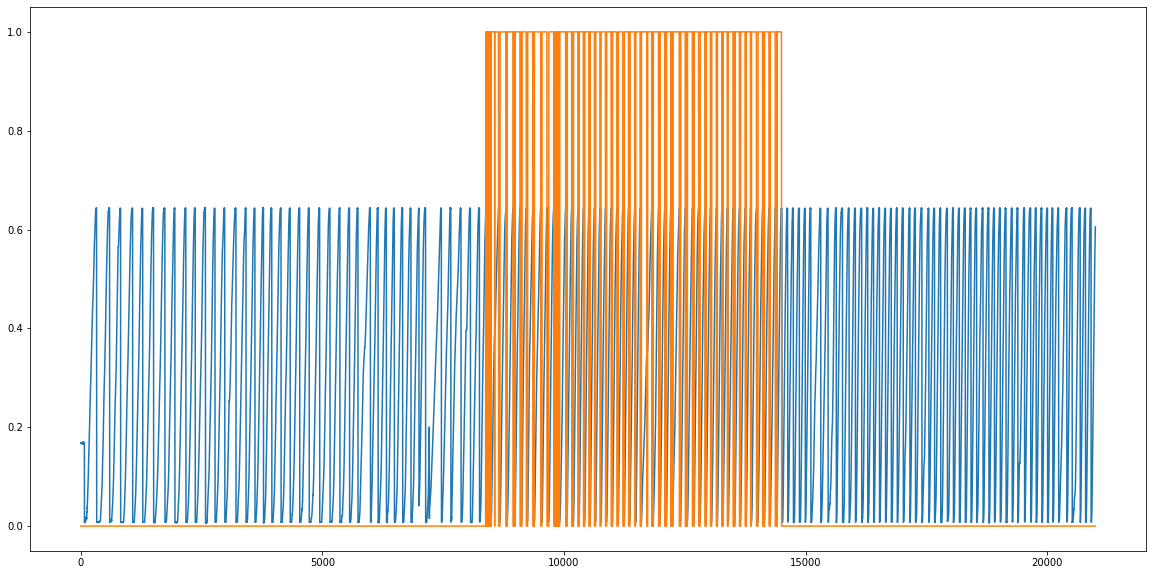

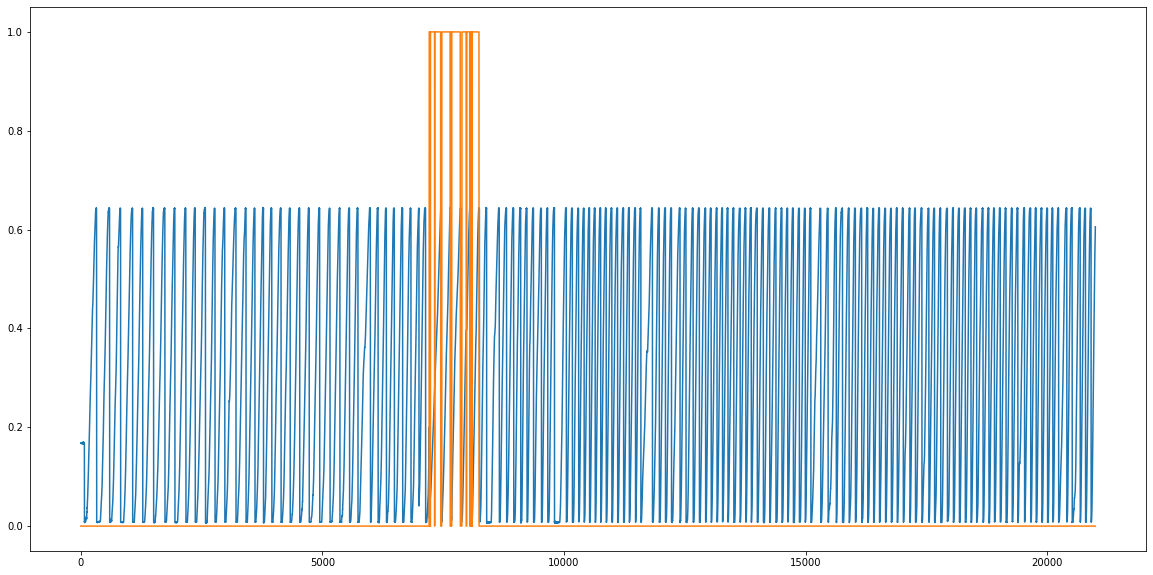

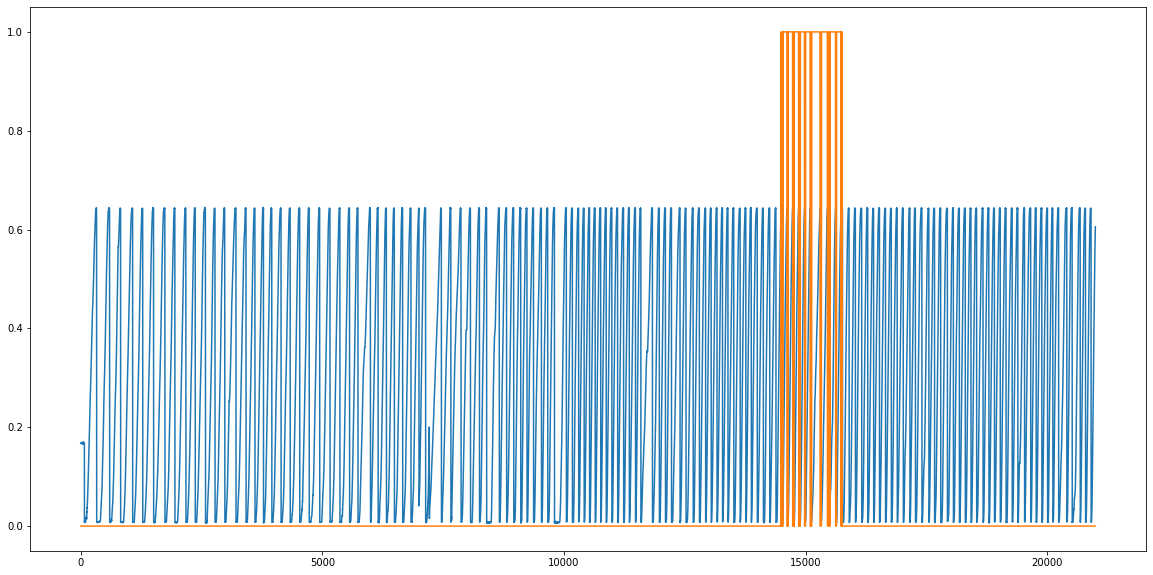

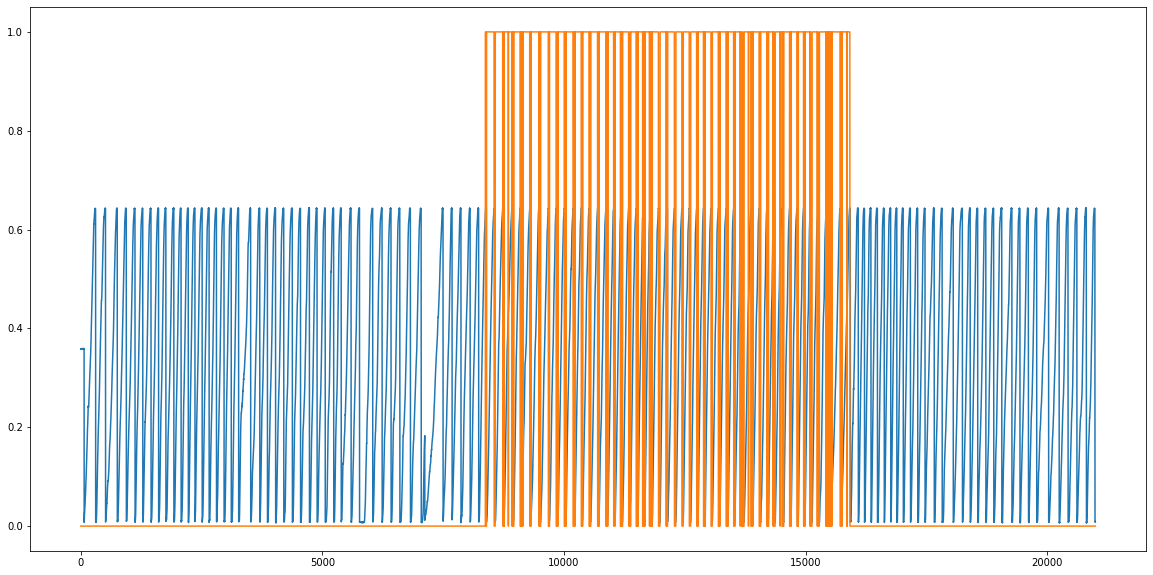

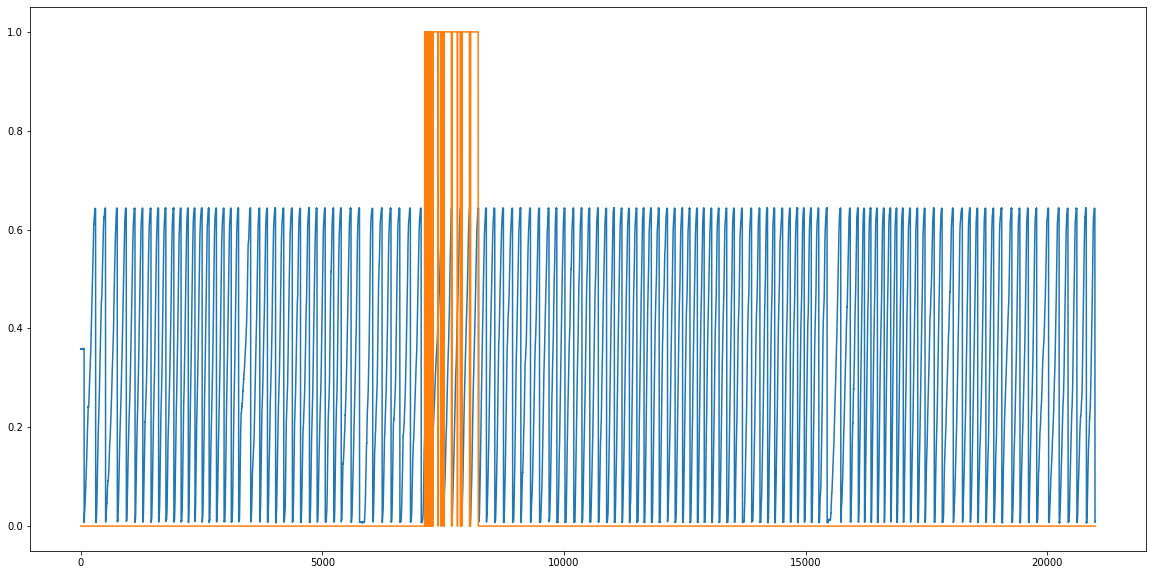

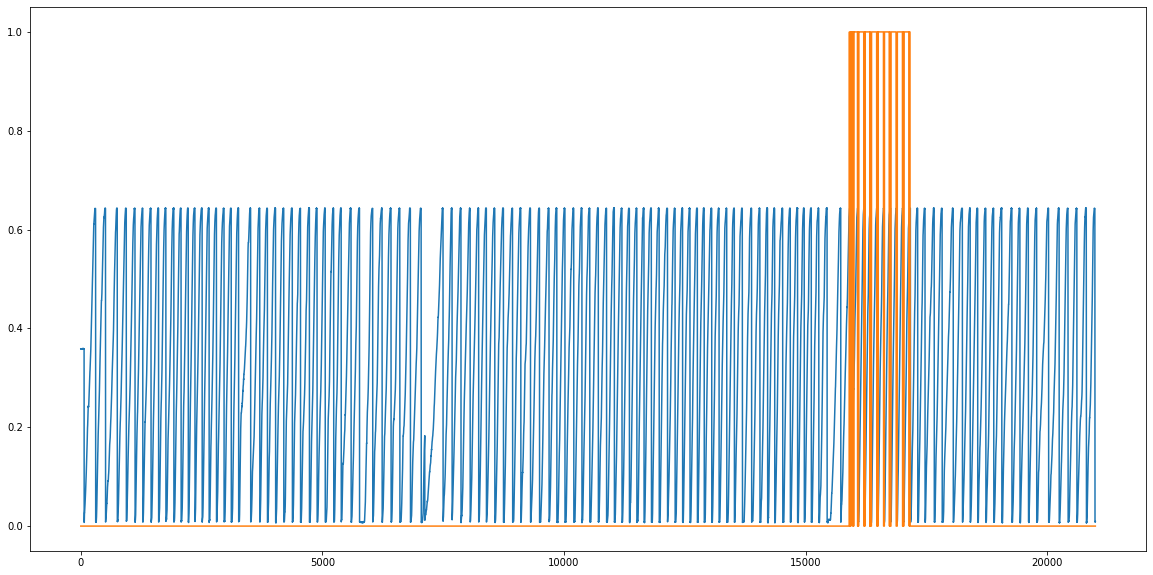

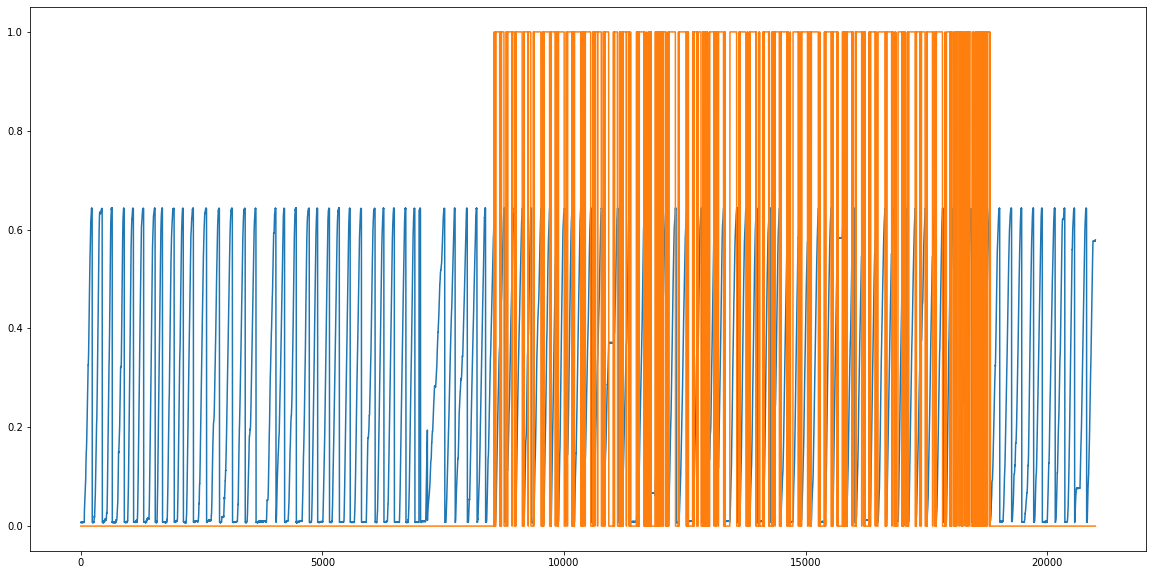

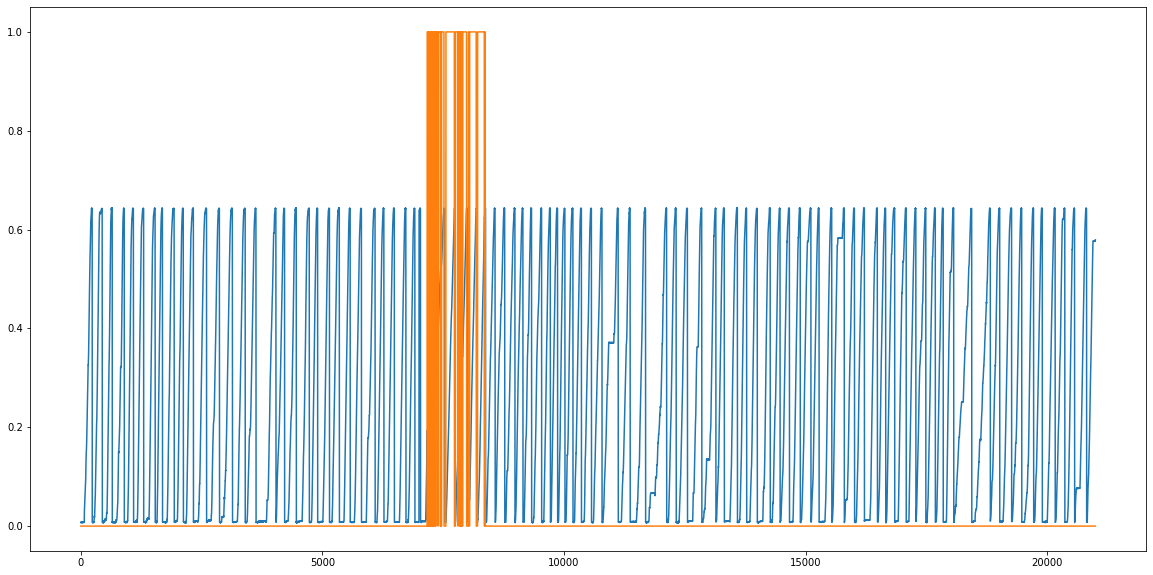

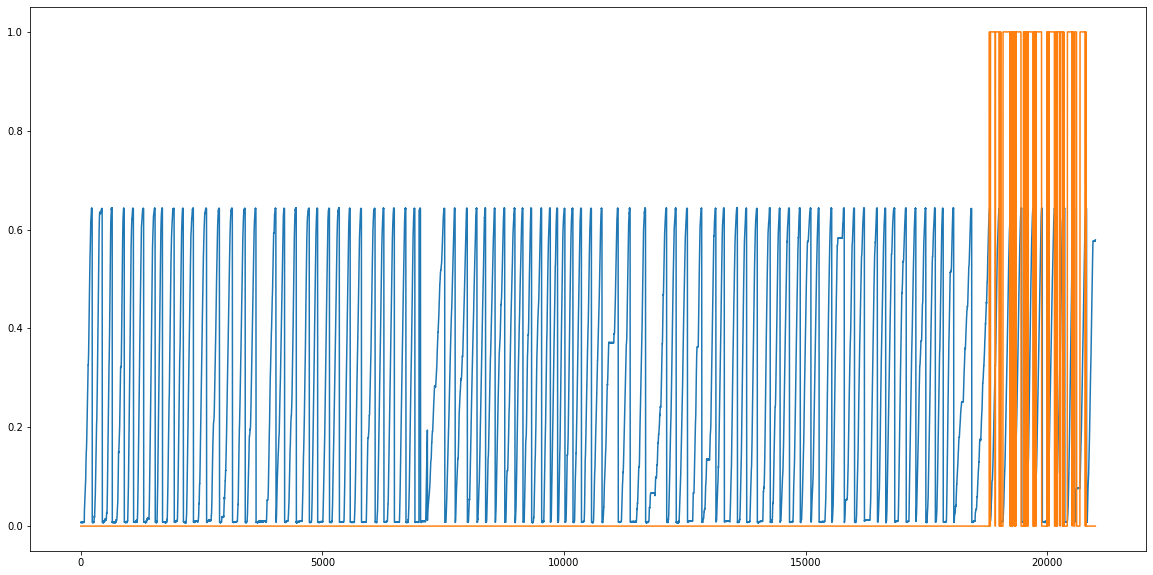

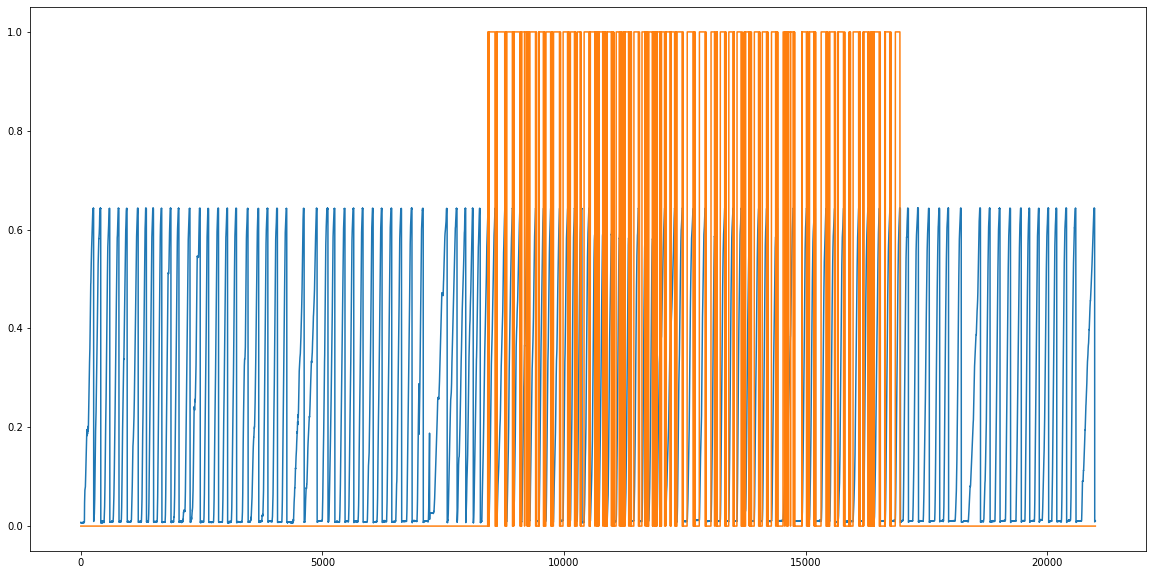

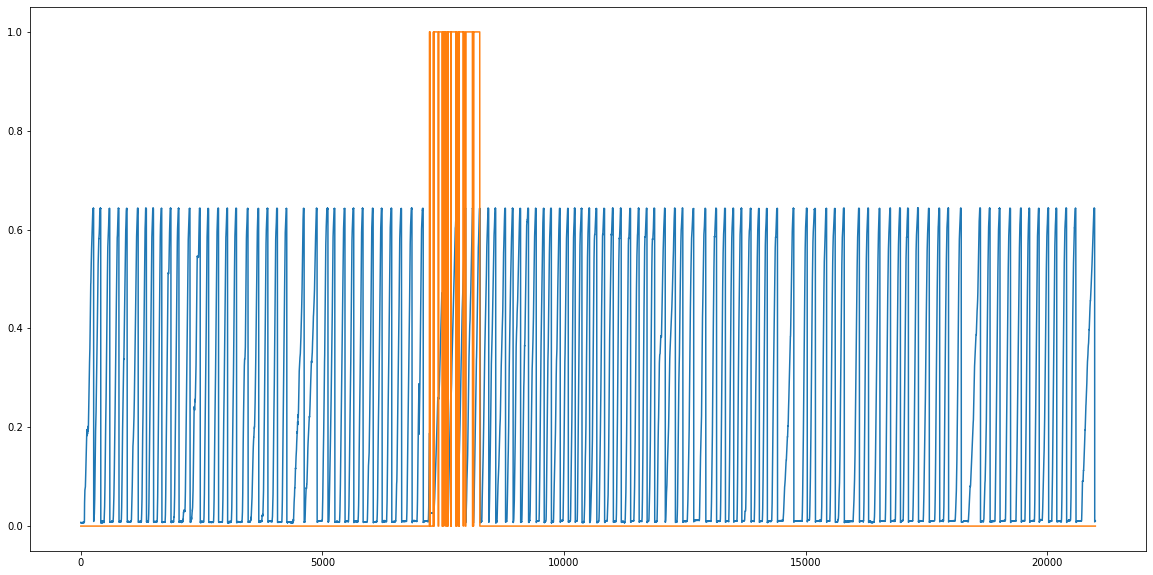

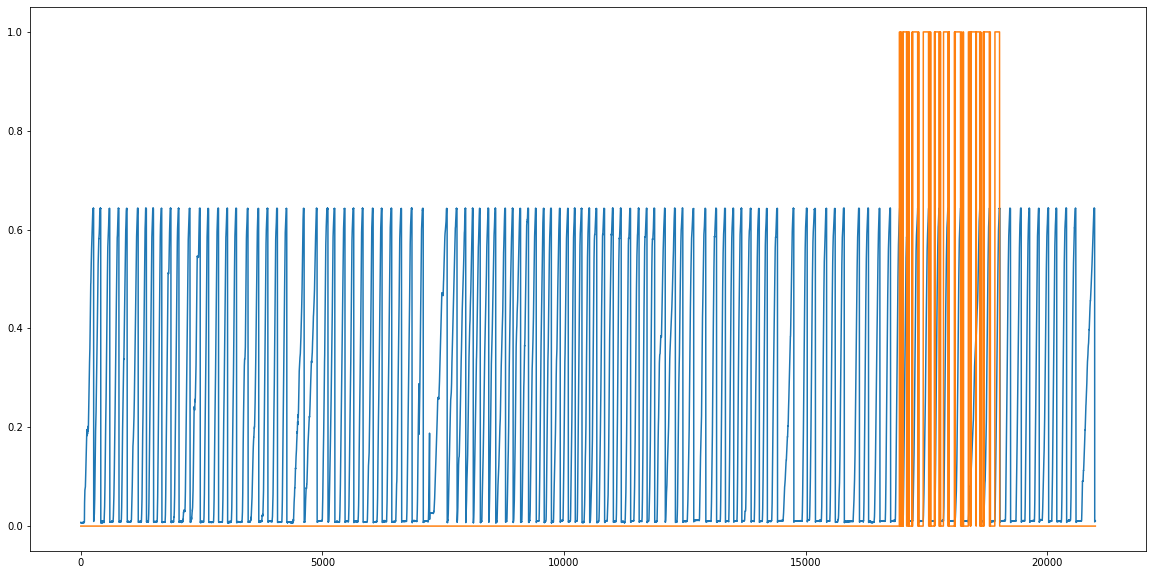

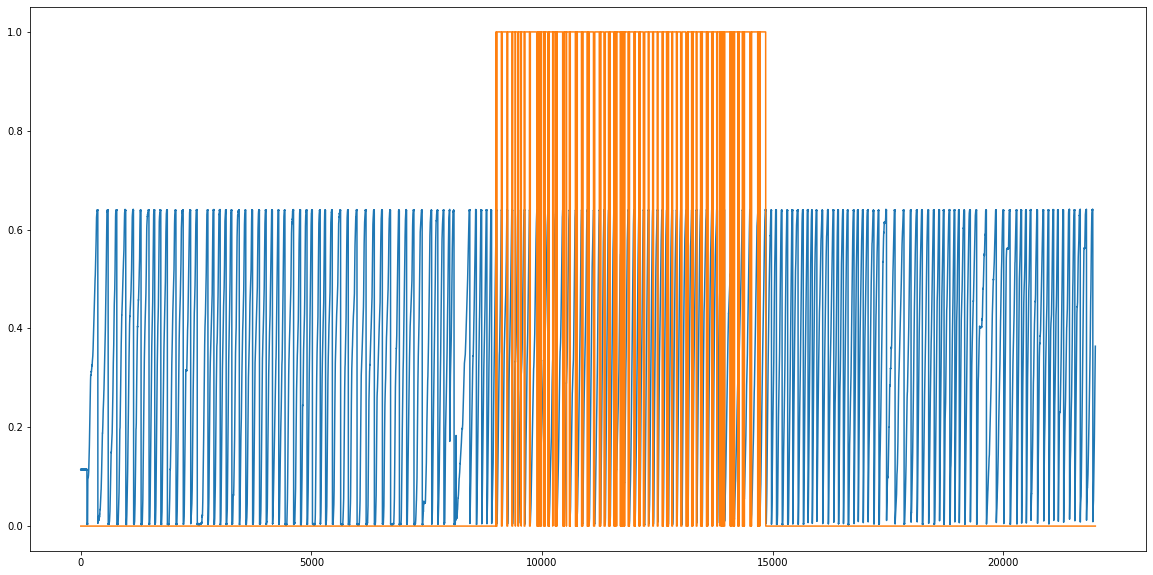

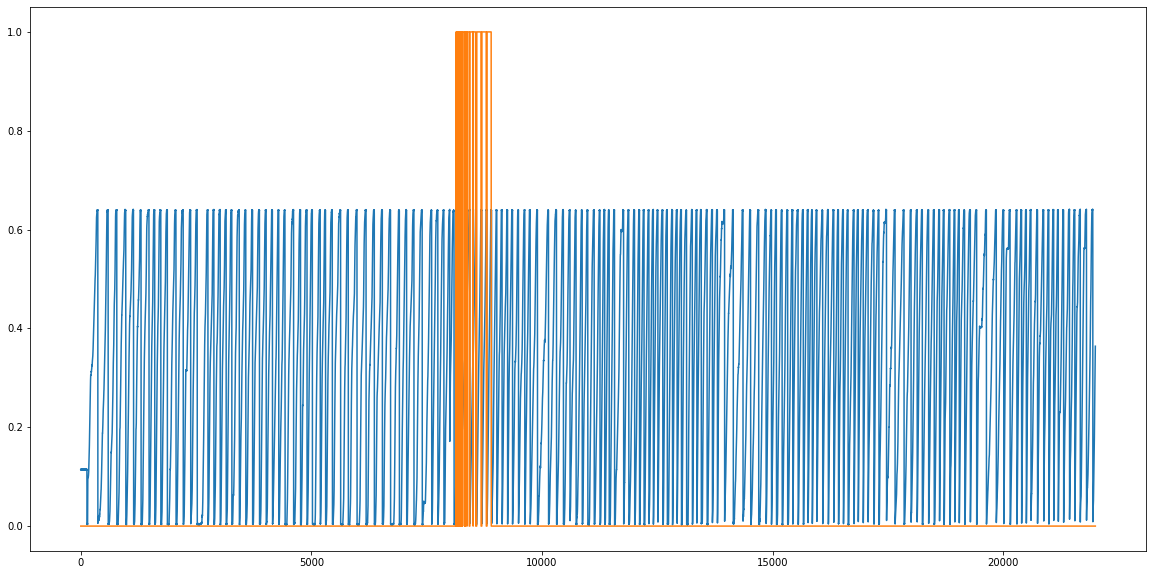

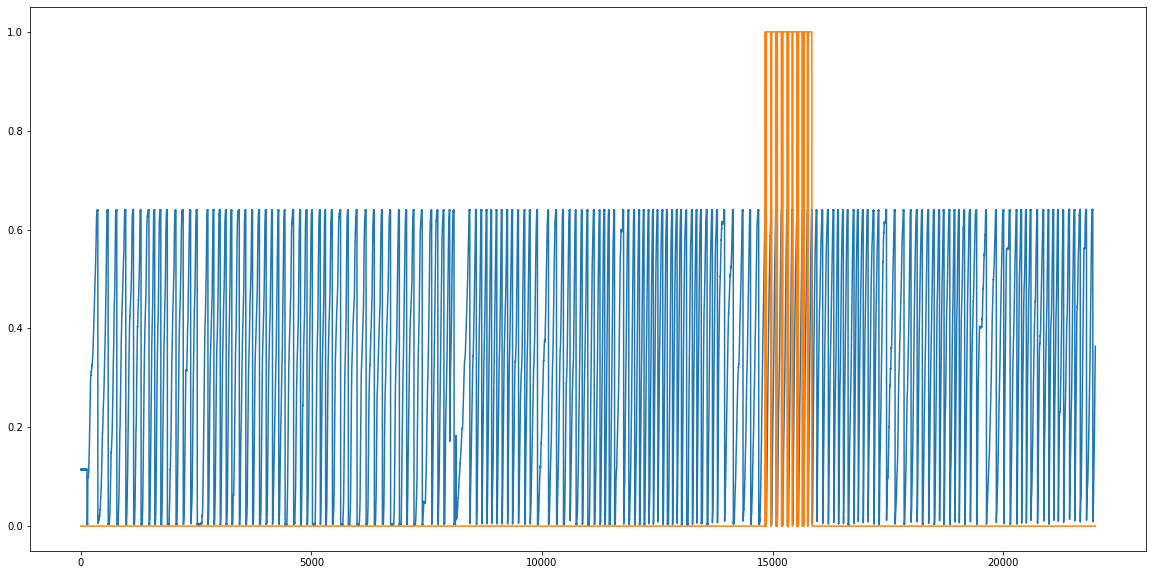

In [12]:
train_group_X=np.array([])
test_group_X=np.array([])
valid_group_X=np.array([])
PC_id=np.array([])
for key in G_CA3.keys():
    train_range=(G_CA3[key]['familiar_lap']+test_lap_num+1,G_CA3[key]['familiar_lap']+test_lap_num+train_lap_num+1)
    test_range=(G_CA3[key]['familiar_lap']+1,G_CA3[key]['familiar_lap']+test_lap_num+1)
    valid_range=(G_CA3[key]['familiar_lap']+test_lap_num+train_lap_num+1,G_CA3[key]['familiar_lap']+test_lap_num+train_lap_num+valid_lap_num+1)
    
    exp=G_CA3[key]['exp']
    pc_id=exp['PC_id']
    
    X_train,y_train,traingroup_X,train_group_pos = get_act_pos_group2(exp, bins_before,bins_after,group_bin,session_type,bin_num,train_range)
    X_test,y_test,testgroup_X,test_group_pos = get_act_pos_group2(exp, bins_before,bins_after,group_bin,2,bin_num,test_range)
    X_valid,y_valid,validgroup_X,valid_group_pos = get_act_pos_group2(exp, bins_before,bins_after,group_bin,session_type,bin_num,valid_range)
    
    train_group_X = np.hstack((train_group_X, traingroup_X)) if train_group_X.size else traingroup_X
    test_group_X = np.hstack((test_group_X, testgroup_X)) if test_group_X.size else testgroup_X
    valid_group_X = np.hstack((valid_group_X, validgroup_X))if valid_group_X.size else validgroup_X
    PC_id = np.hstack((PC_id, pc_id))if PC_id.size else pc_id

In [6]:
# orgnize data for LSTM
X=get_spikes_with_history(train_group_X,bins_before,bins_after,bins_current)
X_v=get_spikes_with_history(valid_group_X,bins_before,bins_after,bins_current)
X_t=get_spikes_with_history(test_group_X,bins_before,bins_after,bins_current)

le = LabelEncoder()
y_lst=[[i] for i in train_group_pos]
y_valid_lst=[[i] for i in valid_group_pos]
y_test_lst=[[i] for i in test_group_pos]

ohe = OneHotEncoder()
Y = ohe.fit_transform(y_lst).toarray()
Y_valid=ohe.fit_transform(y_valid_lst).toarray()
Y_test=ohe.fit_transform(y_test_lst).toarray()

#print(X_valid.shape)
print(X.shape)
print(X_v.shape)
print(X_t.shape)
print(X[-7])


(4062, 13, 918)
(822, 13, 918)
(462, 13, 918)
[[0.         0.         1.42657742 ... 0.         0.         0.        ]
 [0.         0.         1.55437279 ... 0.         0.         0.        ]
 [0.         0.         1.24722131 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

In [25]:
import pandas as pd
data_result=[]
epoch_data_result=[]

model_params = [
    {'unit': 512, 'layer': 2, 'cell_ratio':1},
    {'unit': 256, 'layer': 2, 'cell_ratio':1},
    {'unit': 128, 'layer': 2, 'cell_ratio':1},
    {'unit': 64, 'layer': 2, 'cell_ratio':1},
    {'unit': 1024, 'layer': 1, 'cell_ratio':1},
    {'unit': 512, 'layer': 1, 'cell_ratio':1},
    {'unit': 256, 'layer': 1, 'cell_ratio':1},
    {'unit': 128, 'layer': 1, 'cell_ratio':1},

]


In [26]:
##test epochs
root_dir = r'..\Neural_Decoding\training_models'
model_path = os.path.join(root_dir, 'ca3_group_params_epoch30_test')
os.makedirs(root_dir, exist_ok=True)
trail_num=3
score=np.zeros([trail_num,len(model_params)])
diff=np.zeros([trail_num,len(model_params)])
for trial in range(trail_num):
    for i in range(len(model_params)):
        #cell_ratio=model_params[i]['cell_ratio']
        #cell_num=int(np.ceil((X.shape[2])*cell_ratio))
        #X_random,X_v_random,X_t_random=get_random_sample(X,X_v,X_t,cell_num)
        cur_m_p={'unit': model_params[i]['unit'], 'layer': model_params[i]['layer']}

        X_train_set = X[bins_before:-1-bins_after, :, :]
        Y_train_set = Y[bins_before:-1-bins_after, :]
        X_valid_set = X_v[bins_before:-1-bins_after, :, :]
        Y_valid_set = Y_valid[bins_before:-1-bins_after, :]
        X_test_set = X_t[bins_before:-1-bins_after, :, :]
        Y_test_set = Y_test[bins_before:-1-bins_after, :]
        
        if trial==0:
            LSTM_model=fit_LSTM(X_train_set, Y_train_set, X_valid_set, Y_valid_set,100, model_path, 
                      cur_m_p,force=True)
        else:

            LSTM_model=fit_LSTM(X_train_set, Y_train_set, X_valid_set, Y_valid_set,100, model_path, 
                                  cur_m_p,force=True)
        y_valid_predicted=LSTM_model.predict(X_valid_set)
        y_test_predicted=LSTM_model.predict(X_test_set)
        y_train_predicted=LSTM_model.predict(X_train_set)
        
        #Y = ohe.fit_transform(y_lst).toarray()
        #Y_valid=ohe.fit_transform(y_valid_lst).toarray()
        #Y_test=ohe.fit_transform(y_test_lst).toarray()

        y_valid_pre_inverse=ohe.inverse_transform(y_valid_predicted)
        y_test_pre_inverse=ohe.inverse_transform(y_test_predicted)
        
        score[trial,i] = sklearn.metrics.r2_score(valid_group_pos[bins_before:-bins_after-1], y_valid_pre_inverse)
        diff[trial,i] = sklearn.metrics.mean_squared_error(valid_group_pos[bins_before:-bins_after-1], y_valid_pre_inverse)
        
        

        lap_s_v,lap_d_t=compute_lap_score(X_v, valid_group_pos,LSTM_model,bins_before,bins_after)
        lap_s_test,lap_d_test=compute_lap_score(X_t, test_group_pos,LSTM_model,bins_before,bins_after)
        lap_s_train,lap_d_train=compute_lap_score(X, train_group_pos,LSTM_model,bins_before,bins_after)

        epoch_data_result.append(dict(v_score=lap_s_v, v_diff=lap_d_t,
                                test_score=lap_s_test, test_diff=lap_d_test,
                                train_score=lap_s_train, train_diff=lap_d_train,
                                **model_params[i]))
    

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 32s 8ms/sample - loss: 0.0593 - accuracy: 0.1232
Epoch 2/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0258 - accuracy: 0.4016
Epoch 3/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0205 - accuracy: 0.5992
Epoch 4/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0169 - accuracy: 0.6866
Epoch 5/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0140 - accuracy: 0.7449
Epoch 6/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0120 - accuracy: 0.7782
Epoch 7/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0106 - accuracy: 0.7987
Epoch 8/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0093 - accuracy: 0.8281
Epoch 9/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0083 - accuracy: 0.8471

4049/4049 [==============================] - 30s 7ms/sample - loss: 3.6449e-04 - accuracy: 0.9965
Epoch 74/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 2.7136e-04 - accuracy: 0.9975
Epoch 75/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 3.2157e-04 - accuracy: 0.9968
Epoch 76/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 3.2024e-04 - accuracy: 0.9965
Epoch 77/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 3.6166e-04 - accuracy: 0.9960
Epoch 78/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 3.1988e-04 - accuracy: 0.9965
Epoch 79/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 3.3374e-04 - accuracy: 0.9960
Epoch 80/100
4049/4049 [==============================] - 32s 8ms/sample - loss: 2.4301e-04 - accuracy: 0.9978 - val_loss: 0.0196 - val_accuracy: 0.6267
Epoch 81/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 3.

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 13s 3ms/sample - loss: 0.0362 - accuracy: 0.1736s - loss:
Epoch 2/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0256 - accuracy: 0.4196s - loss: 0
Epoch 3/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0211 - accuracy: 0.6016
Epoch 4/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0171 - accuracy: 0.7293
Epoch 5/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0142 - accuracy: 0.7738
Epoch 6/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0119 - accuracy: 0.8140
Epoch 7/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0101 - accuracy: 0.8363
Epoch 8/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0089 - accuracy: 0.8629
Epoch 9/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.008

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 6s 2ms/sample - loss: 0.0328 - accuracy: 0.1583
Epoch 2/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0264 - accuracy: 0.3905
Epoch 3/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0226 - accuracy: 0.5794
Epoch 4/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0194 - accuracy: 0.7009
Epoch 5/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0165 - accuracy: 0.7627
Epoch 6/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0142 - accuracy: 0.8049
Epoch 7/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0123 - accuracy: 0.8274
Epoch 8/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0109 - accuracy: 0.8442
Epoch 9/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0098 - accuracy: 0.8538
Epoch 10

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 4s 948us/sample - loss: 0.0327 - accuracy: 0.1262
Epoch 2/100
4049/4049 [==============================] - 2s 486us/sample - loss: 0.0279 - accuracy: 0.3396
Epoch 3/100
4049/4049 [==============================] - 2s 485us/sample - loss: 0.0249 - accuracy: 0.5036
Epoch 4/100
4049/4049 [==============================] - 2s 486us/sample - loss: 0.0222 - accuracy: 0.6278
Epoch 5/100
4049/4049 [==============================] - 2s 485us/sample - loss: 0.0198 - accuracy: 0.7120
Epoch 6/100
4049/4049 [==============================] - 2s 488us/sample - loss: 0.0176 - accuracy: 0.7676
Epoch 7/100
4049/4049 [==============================] - 2s 487us/sample - loss: 0.0158 - accuracy: 0.8076
Epoch 8/100
4049/4049 [==============================] - 2s 484us/sample - loss: 0.0142 - accuracy: 0.8251
Epoch 9/100
4049/4049 [==============================] - 2s 500us/sample - loss: 0.0130 - accurac

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 40s 10ms/sample - loss: 0.0700 - accuracy: 0.0879
Epoch 2/100
4049/4049 [==============================] - 39s 10ms/sample - loss: 0.0400 - accuracy: 0.2107
Epoch 3/100
4049/4049 [==============================] - 39s 10ms/sample - loss: 0.0353 - accuracy: 0.3132
Epoch 4/100
4049/4049 [==============================] - 39s 10ms/sample - loss: 0.0318 - accuracy: 0.4327
Epoch 5/100
4049/4049 [==============================] - 39s 10ms/sample - loss: 0.0295 - accuracy: 0.5016
Epoch 6/100
4049/4049 [==============================] - 39s 10ms/sample - loss: 0.0272 - accuracy: 0.5557
Epoch 7/100
4049/4049 [==============================] - 39s 10ms/sample - loss: 0.0253 - accuracy: 0.6253
Epoch 8/100
4049/4049 [==============================] - 39s 10ms/sample - loss: 0.0237 - accuracy: 0.6634
Epoch 9/100
4049/4049 [==============================] - 39s 10ms/sample - loss: 0.0222 - accurac

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 19s 5ms/sample - loss: 0.0520 - accuracy: 0.1020
Epoch 2/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0343 - accuracy: 0.2544
Epoch 3/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0309 - accuracy: 0.3786
Epoch 4/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0288 - accuracy: 0.4549
Epoch 5/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0271 - accuracy: 0.5404
Epoch 6/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0253 - accuracy: 0.5955
Epoch 7/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0239 - accuracy: 0.6436
Epoch 8/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0226 - accuracy: 0.6972
Epoch 9/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0215 - accuracy: 0.7291

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 9s 2ms/sample - loss: 0.0458 - accuracy: 0.1094
Epoch 2/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0315 - accuracy: 0.2786
Epoch 3/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0285 - accuracy: 0.4050
Epoch 4/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0265 - accuracy: 0.4890
Epoch 5/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0246 - accuracy: 0.56530s - loss: 0.0246 
Epoch 6/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0232 - accuracy: 0.6231
Epoch 7/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0222 - accuracy: 0.6552
Epoch 8/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0212 - accuracy: 0.7014
Epoch 9/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0203 - accurac

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0459 - accuracy: 0.1015
Epoch 2/100
4049/4049 [==============================] - 3s 837us/sample - loss: 0.0308 - accuracy: 0.2645
Epoch 3/100
4049/4049 [==============================] - 3s 843us/sample - loss: 0.0281 - accuracy: 0.3823
Epoch 4/100
4049/4049 [==============================] - 3s 858us/sample - loss: 0.0263 - accuracy: 0.4641
Epoch 5/100
4049/4049 [==============================] - 3s 859us/sample - loss: 0.0248 - accuracy: 0.5268
Epoch 6/100
4049/4049 [==============================] - 4s 874us/sample - loss: 0.0236 - accuracy: 0.5764
Epoch 7/100
4049/4049 [==============================] - 3s 858us/sample - loss: 0.0226 - accuracy: 0.6278
Epoch 8/100
4049/4049 [==============================] - 3s 860us/sample - loss: 0.0217 - accuracy: 0.6468
Epoch 9/100
4049/4049 [==============================] - 4s 873us/sample - loss: 0.0209 - accuracy:

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 31s 8ms/sample - loss: 0.0565 - accuracy: 0.1341
Epoch 2/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 0.0259 - accuracy: 0.3840
Epoch 3/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 0.0208 - accuracy: 0.5819
Epoch 4/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 0.0171 - accuracy: 0.6831
Epoch 5/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 0.0143 - accuracy: 0.7291
Epoch 6/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 0.0120 - accuracy: 0.7748
Epoch 7/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 0.0103 - accuracy: 0.8014
Epoch 8/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 0.0093 - accuracy: 0.8345
Epoch 9/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 0.0082 - accuracy: 0.8511

4049/4049 [==============================] - 30s 7ms/sample - loss: 2.5906e-04 - accuracy: 0.9975
Epoch 74/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 1.6746e-04 - accuracy: 0.9998
Epoch 75/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 2.8152e-04 - accuracy: 0.9973
Epoch 76/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 2.9256e-04 - accuracy: 0.9968
Epoch 77/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 3.3047e-04 - accuracy: 0.9965
Epoch 78/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 2.3092e-04 - accuracy: 0.9978
Epoch 79/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 2.5140e-04 - accuracy: 0.9980
Epoch 80/100
4049/4049 [==============================] - 31s 8ms/sample - loss: 2.3280e-04 - accuracy: 0.9978 - val_loss: 0.0197 - val_accuracy: 0.6341
Epoch 81/100
4049/4049 [==============================] - 29s 7ms/sample - loss: 3.

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 13s 3ms/sample - loss: 0.0365 - accuracy: 0.1694
Epoch 2/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0254 - accuracy: 0.4329
Epoch 3/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0207 - accuracy: 0.6194
Epoch 4/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0170 - accuracy: 0.7249
Epoch 5/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0141 - accuracy: 0.7819
Epoch 6/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0119 - accuracy: 0.8140
Epoch 7/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0100 - accuracy: 0.8409
Epoch 8/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0087 - accuracy: 0.8627
Epoch 9/100
4049/4049 [==============================] - 11s 3ms/sample - loss: 0.0080 - accuracy: 0.8696

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 6s 2ms/sample - loss: 0.0334 - accuracy: 0.1553
Epoch 2/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0266 - accuracy: 0.3910
Epoch 3/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0229 - accuracy: 0.5589
Epoch 4/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0196 - accuracy: 0.6831
Epoch 5/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0168 - accuracy: 0.7555
Epoch 6/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0145 - accuracy: 0.7911
Epoch 7/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0125 - accuracy: 0.8249
Epoch 8/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0108 - accuracy: 0.8486
Epoch 9/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0096 - accuracy: 0.8585
Epoch 10

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0327 - accuracy: 0.1314
Epoch 2/100
4049/4049 [==============================] - 2s 498us/sample - loss: 0.0274 - accuracy: 0.3621
Epoch 3/100
4049/4049 [==============================] - 2s 498us/sample - loss: 0.0244 - accuracy: 0.5221
Epoch 4/100
4049/4049 [==============================] - 2s 498us/sample - loss: 0.0217 - accuracy: 0.6426
Epoch 5/100
4049/4049 [==============================] - 2s 498us/sample - loss: 0.0193 - accuracy: 0.7249
Epoch 6/100
4049/4049 [==============================] - 2s 498us/sample - loss: 0.0171 - accuracy: 0.7765
Epoch 7/100
4049/4049 [==============================] - 2s 498us/sample - loss: 0.0154 - accuracy: 0.8128
Epoch 8/100
4049/4049 [==============================] - 2s 506us/sample - loss: 0.0139 - accuracy: 0.8219
Epoch 9/100
4049/4049 [==============================] - 2s 499us/sample - loss: 0.0125 - accuracy:

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 40s 10ms/sample - loss: 0.0689 - accuracy: 0.0887
Epoch 2/100
4049/4049 [==============================] - 40s 10ms/sample - loss: 0.0379 - accuracy: 0.2084
Epoch 3/100
4049/4049 [==============================] - 40s 10ms/sample - loss: 0.0337 - accuracy: 0.3393
Epoch 4/100
4049/4049 [==============================] - 40s 10ms/sample - loss: 0.0305 - accuracy: 0.4475
Epoch 5/100
4049/4049 [==============================] - 40s 10ms/sample - loss: 0.0283 - accuracy: 0.5265
Epoch 6/100
4049/4049 [==============================] - 40s 10ms/sample - loss: 0.0264 - accuracy: 0.5925
Epoch 7/100
4049/4049 [==============================] - 40s 10ms/sample - loss: 0.0245 - accuracy: 0.6453
Epoch 8/100
4049/4049 [==============================] - 40s 10ms/sample - loss: 0.0229 - accuracy: 0.6876
Epoch 9/100
4049/4049 [==============================] - 39s 10ms/sample - loss: 0.0216 - accurac

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 18s 5ms/sample - loss: 0.0497 - accuracy: 0.1047
Epoch 2/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0337 - accuracy: 0.2606
Epoch 3/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0304 - accuracy: 0.3939
Epoch 4/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0283 - accuracy: 0.4717
Epoch 5/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0263 - accuracy: 0.5503
Epoch 6/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0246 - accuracy: 0.6182
Epoch 7/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0234 - accuracy: 0.6621
Epoch 8/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0223 - accuracy: 0.6831
Epoch 9/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0210 - accuracy: 0.7266

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 9s 2ms/sample - loss: 0.0445 - accuracy: 0.1013
Epoch 2/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0308 - accuracy: 0.2929
Epoch 3/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0278 - accuracy: 0.4139
Epoch 4/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0258 - accuracy: 0.4959
Epoch 5/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0242 - accuracy: 0.5784
Epoch 6/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0229 - accuracy: 0.6234
Epoch 7/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0218 - accuracy: 0.6579
Epoch 8/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0207 - accuracy: 0.6945
Epoch 9/100
4049/4049 [==============================] - 8s 2ms/sample - loss: 0.0199 - accuracy: 0.7254
Epoch 10

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0503 - accuracy: 0.0926
Epoch 2/100
4049/4049 [==============================] - 4s 880us/sample - loss: 0.0315 - accuracy: 0.2401
Epoch 3/100
4049/4049 [==============================] - 4s 887us/sample - loss: 0.0290 - accuracy: 0.3492
Epoch 4/100
4049/4049 [==============================] - 4s 900us/sample - loss: 0.0272 - accuracy: 0.4411
Epoch 5/100
4049/4049 [==============================] - 4s 909us/sample - loss: 0.0259 - accuracy: 0.5063
Epoch 6/100
4049/4049 [==============================] - 4s 904us/sample - loss: 0.0248 - accuracy: 0.5557
Epoch 7/100
4049/4049 [==============================] - 4s 905us/sample - loss: 0.0238 - accuracy: 0.5922
Epoch 8/100
4049/4049 [==============================] - 4s 930us/sample - loss: 0.0229 - accuracy: 0.6172
Epoch 9/100
4049/4049 [==============================] - 4s 908us/sample - loss: 0.0221 - accuracy:

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 32s 8ms/sample - loss: 0.0579 - accuracy: 0.1311
Epoch 2/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0257 - accuracy: 0.4120
Epoch 3/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0205 - accuracy: 0.5848
Epoch 4/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0168 - accuracy: 0.6886
Epoch 5/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0139 - accuracy: 0.7523
Epoch 6/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0119 - accuracy: 0.7755
Epoch 7/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0102 - accuracy: 0.8083
Epoch 8/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0093 - accuracy: 0.8301
Epoch 9/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 0.0081 - accuracy: 0.8590

4049/4049 [==============================] - 30s 7ms/sample - loss: 2.9697e-04 - accuracy: 0.9980
Epoch 74/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 3.7548e-04 - accuracy: 0.9956
Epoch 75/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 2.9639e-04 - accuracy: 0.9978
Epoch 76/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 3.1032e-04 - accuracy: 0.9965
Epoch 77/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 2.3805e-04 - accuracy: 0.9978
Epoch 78/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 1.7077e-04 - accuracy: 0.9993
Epoch 79/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 2.7327e-04 - accuracy: 0.9978
Epoch 80/100
4049/4049 [==============================] - 32s 8ms/sample - loss: 2.8773e-04 - accuracy: 0.9975 - val_loss: 0.0195 - val_accuracy: 0.6477
Epoch 81/100
4049/4049 [==============================] - 30s 7ms/sample - loss: 1.

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 17s 4ms/sample - loss: 0.0367 - accuracy: 0.1509
Epoch 2/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0259 - accuracy: 0.4181
Epoch 3/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0213 - accuracy: 0.6036
Epoch 4/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0173 - accuracy: 0.7209
Epoch 5/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0142 - accuracy: 0.7738
Epoch 6/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0118 - accuracy: 0.8121
Epoch 7/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0100 - accuracy: 0.8429
Epoch 8/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0089 - accuracy: 0.8570
Epoch 9/100
4049/4049 [==============================] - 12s 3ms/sample - loss: 0.0079 - accuracy: 0.8775

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 7s 2ms/sample - loss: 0.0332 - accuracy: 0.1472
Epoch 2/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0266 - accuracy: 0.3850
Epoch 3/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0229 - accuracy: 0.5614
Epoch 4/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0196 - accuracy: 0.6797
Epoch 5/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0169 - accuracy: 0.7389
Epoch 6/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0146 - accuracy: 0.7943
Epoch 7/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0128 - accuracy: 0.8177
Epoch 8/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0113 - accuracy: 0.8345
Epoch 9/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0101 - accuracy: 0.8471
Epoch 10

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0323 - accuracy: 0.1408
Epoch 2/100
4049/4049 [==============================] - 3s 652us/sample - loss: 0.0275 - accuracy: 0.3544
Epoch 3/100
4049/4049 [==============================] - 3s 652us/sample - loss: 0.0246 - accuracy: 0.5172
Epoch 4/100
4049/4049 [==============================] - 3s 663us/sample - loss: 0.0221 - accuracy: 0.6352
Epoch 5/100
4049/4049 [==============================] - 3s 651us/sample - loss: 0.0199 - accuracy: 0.7172
Epoch 6/100
4049/4049 [==============================] - 3s 660us/sample - loss: 0.0177 - accuracy: 0.7730
Epoch 7/100
4049/4049 [==============================] - 3s 652us/sample - loss: 0.0158 - accuracy: 0.8079
Epoch 8/100
4049/4049 [==============================] - 3s 648us/sample - loss: 0.0143 - accuracy: 0.8301
Epoch 9/100
4049/4049 [==============================] - 3s 647us/sample - loss: 0.0128 - accuracy:

4049/4049 [==============================] - 3s 638us/sample - loss: 0.0013 - accuracy: 0.9884
Epoch 74/100
4049/4049 [==============================] - 3s 652us/sample - loss: 0.0013 - accuracy: 0.9899
Epoch 75/100
4049/4049 [==============================] - 3s 640us/sample - loss: 0.0012 - accuracy: 0.9884
Epoch 76/100
4049/4049 [==============================] - 3s 639us/sample - loss: 0.0012 - accuracy: 0.9906
Epoch 77/100
4049/4049 [==============================] - 3s 640us/sample - loss: 0.0012 - accuracy: 0.9901
Epoch 78/100
4049/4049 [==============================] - 3s 646us/sample - loss: 0.0012 - accuracy: 0.9886
Epoch 79/100
4049/4049 [==============================] - 3s 640us/sample - loss: 0.0012 - accuracy: 0.9896
Epoch 80/100
4049/4049 [==============================] - 3s 712us/sample - loss: 0.0011 - accuracy: 0.9916 - val_loss: 0.0177 - val_accuracy: 0.6922
Epoch 81/100
4049/4049 [==============================] - 3s 641us/sample - loss: 0.0011 - accuracy: 0.9909

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 42s 10ms/sample - loss: 0.0697 - accuracy: 0.0914
Epoch 2/100
4049/4049 [==============================] - 41s 10ms/sample - loss: 0.0379 - accuracy: 0.2233
Epoch 3/100
4049/4049 [==============================] - 41s 10ms/sample - loss: 0.0333 - accuracy: 0.3384
Epoch 4/100
4049/4049 [==============================] - 41s 10ms/sample - loss: 0.0303 - accuracy: 0.4495
Epoch 5/100
4049/4049 [==============================] - 41s 10ms/sample - loss: 0.0280 - accuracy: 0.5307
Epoch 6/100
4049/4049 [==============================] - 41s 10ms/sample - loss: 0.0259 - accuracy: 0.5843
Epoch 7/100
4049/4049 [==============================] - 41s 10ms/sample - loss: 0.0240 - accuracy: 0.6426
Epoch 8/100
4049/4049 [==============================] - 41s 10ms/sample - loss: 0.0226 - accuracy: 0.6915
Epoch 9/100
4049/4049 [==============================] - 41s 10ms/sample - loss: 0.0211 - accurac

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 19s 5ms/sample - loss: 0.0505 - accuracy: 0.1055
Epoch 2/100
4049/4049 [==============================] - 18s 4ms/sample - loss: 0.0334 - accuracy: 0.2680
Epoch 3/100
4049/4049 [==============================] - 18s 4ms/sample - loss: 0.0298 - accuracy: 0.4075
Epoch 4/100
4049/4049 [==============================] - 18s 4ms/sample - loss: 0.0276 - accuracy: 0.4890
Epoch 5/100
4049/4049 [==============================] - 18s 4ms/sample - loss: 0.0258 - accuracy: 0.5646
Epoch 6/100
4049/4049 [==============================] - 18s 4ms/sample - loss: 0.0242 - accuracy: 0.6369
Epoch 7/100
4049/4049 [==============================] - 18s 4ms/sample - loss: 0.0227 - accuracy: 0.6760
Epoch 8/100
4049/4049 [==============================] - 18s 4ms/sample - loss: 0.0215 - accuracy: 0.7155
Epoch 9/100
4049/4049 [==============================] - 18s 4ms/sample - loss: 0.0204 - accuracy: 0.7375

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 10s 2ms/sample - loss: 0.0454 - accuracy: 0.1168
Epoch 2/100
4049/4049 [==============================] - 9s 2ms/sample - loss: 0.0312 - accuracy: 0.2872
Epoch 3/100
4049/4049 [==============================] - 9s 2ms/sample - loss: 0.0286 - accuracy: 0.4038
Epoch 4/100
4049/4049 [==============================] - 9s 2ms/sample - loss: 0.0266 - accuracy: 0.4786
Epoch 5/100
4049/4049 [==============================] - 9s 2ms/sample - loss: 0.0250 - accuracy: 0.5621
Epoch 6/100
4049/4049 [==============================] - 9s 2ms/sample - loss: 0.0238 - accuracy: 0.6058
Epoch 7/100
4049/4049 [==============================] - 9s 2ms/sample - loss: 0.0228 - accuracy: 0.6532
Epoch 8/100
4049/4049 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.68 - 9s 2ms/sample - loss: 0.0218 - accuracy: 0.6876
Epoch 9/100
4049/4049 [==============================] - 9s 2ms/sample

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

Train on 4049 samples, validate on 809 samples
Epoch 1/100
4049/4049 [==============================] - 5s 1ms/sample - loss: 0.0466 - accuracy: 0.0882
Epoch 2/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0313 - accuracy: 0.2329
Epoch 3/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0289 - accuracy: 0.3507
Epoch 4/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0269 - accuracy: 0.4416
Epoch 5/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0255 - accuracy: 0.5100
Epoch 6/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0243 - accuracy: 0.5616
Epoch 7/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0232 - accuracy: 0.6029
Epoch 8/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0224 - accuracy: 0.6300
Epoch 9/100
4049/4049 [==============================] - 4s 1ms/sample - loss: 0.0216 - accuracy: 0.6584
Epoch 10

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[  5  95 185 275 365 462]
[  5  95 185 275 365 462]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]
[   5   95  185  275  365  455  545  635  725  815  905  995 1085 1175
 1265 1355 1445 1535 1625 1715 1805 1895 1985 2075 2165 2255 2345 2435
 2525 2615 2705 2795 2885 2975 3065 3155 3245 3335 3425 3515 3605 3695
 3785 3875 3965 4062]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a

In [22]:
get_lap_id(test_group_pos,bins_before)
test_group_pos

[  5  95 185 275 365 462]


array([16., 16., 16., 16., 16., 16., 16.,  1.,  1.,  2.,  2.,  2.,  3.,
        3.,  3.,  4.,  4.,  4.,  5.,  5.,  5.,  6.,  6.,  6.,  7.,  7.,
        7.,  8.,  8.,  8.,  9.,  9.,  9., 10., 10., 10., 11., 11., 11.,
       12., 12., 12., 13., 13., 13., 14., 14., 14., 15., 15., 15., 16.,
       16., 16., 17., 17., 17., 18., 18., 18., 19., 19., 19., 20., 20.,
       20., 21., 21., 21., 22., 22., 22., 23., 23., 23., 24., 24., 24.,
       25., 25., 25., 26., 26., 26., 27., 27., 27., 28., 28., 28., 29.,
       29., 29., 30., 30., 30.,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,
        3.,  4.,  4.,  4.,  5.,  5.,  5.,  6.,  6.,  6.,  7.,  7.,  7.,
        8.,  8.,  8.,  9.,  9.,  9., 10., 10., 10., 11., 11., 11., 12.,
       12., 12., 13., 13., 13., 14., 14., 14., 15., 15., 15., 16., 16.,
       16., 17., 17., 17., 18., 18., 18., 19., 19., 19., 20., 20., 20.,
       21., 21., 21., 22., 22., 22., 23., 23., 23., 24., 24., 24., 25.,
       25., 25., 26., 26., 26., 27., 27., 27., 28., 28., 28., 29

In [28]:
score
np.save('ca3parameter1_score.npy', score) # save
np.save('ca3parameter1_diff.npy', diff)

In [29]:
epoch_data_result

[{'v_score': array([0.84475108, 0.99398014, 0.95421741, 0.9550095 , 0.8602786 ,
         0.55944158, 0.98368302, 0.92898095, 0.        ]),
  'v_diff': array([11.13636364,  0.43181818,  3.28409091,  3.22727273,  9.98863636,
         31.60227273,  1.17045455,  5.04494382,  0.        ]),
  'test_score': array([ 0.04686818, -0.68413397, -0.33894274,  0.17464604,  0.80060913,
          0.        ]),
  'test_diff': array([ 66.93103448, 120.80681818,  96.04545455,  59.20454545,
          14.62921348,   0.        ]),
  'train_score': array([0.99746532, 0.99699007, 0.99603957, 0.94615184, 0.99746532,
         0.99746532, 0.99730691, 0.99746532, 0.99746532, 0.99794058,
         0.96120969, 0.99588115, 0.86344432, 0.99809899, 0.99699007,
         0.86502849, 0.97576216, 0.99794058, 0.99778216, 0.92063295,
         0.99809899, 0.99857424, 0.99556432, 0.99730691, 0.99714849,
         0.99730691, 0.95957296, 0.99714849, 0.99619799, 0.99730691,
         0.99572273, 0.99793752, 0.86376115, 0.99698465,

In [30]:
np.save('ca3parameter1_bylap.npy', epoch_data_result)

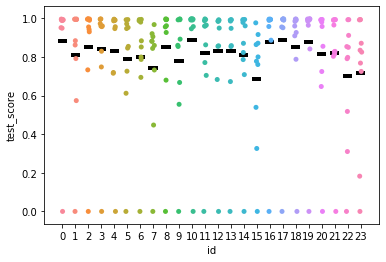

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

test_diff_list = []
for i in range(len(epoch_data_result)):
    epoch_data_result[i]['id'] = i
    entry = epoch_data_result[i]
    for j in range(len(entry['v_diff'])):
        test_diff_list.append({
            'id':i,
            'test_diff':entry['v_diff'][j],
            'test_score':entry['v_score'][j]
        })
                   
test_diff_list_cp=pd.DataFrame(test_diff_list) 


ax = sns.stripplot(x="id", y="test_score", data=test_diff_list_cp)

median_width = 0.4
group_median_val=[]

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    sample_name = int(text.get_text())  # "X" or "Y"

    # calculate the median value for all replicates of either X or Y
    #median_val = new_pd_result[(new_pd_result['lap']==0)&(new_pd_result['type']==sample_name)].predict_error.median()
    median_val = test_diff_list_cp[(test_diff_list_cp['id']==sample_name)].test_score.mean()
    group_median_val=np.append(group_median_val,median_val)
    # plot horizontal lines across the column, centered on the tick
    ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=4, color='k')
    
plt.show()
#ax.figure.savefig('parameters_30.png')

In [12]:
test_diff_list

[{'id': 0, 'test_diff': 11.136363636363637, 'test_score': 0.8447510778674876},
 {'id': 0, 'test_diff': 0.4318181818181818, 'test_score': 0.9939801438356781},
 {'id': 0, 'test_diff': 3.284090909090909, 'test_score': 0.954217409697657},
 {'id': 0, 'test_diff': 3.227272727272727, 'test_score': 0.9550094960350678},
 {'id': 0, 'test_diff': 9.988636363636363, 'test_score': 0.8602786046646052},
 {'id': 0, 'test_diff': 31.602272727272727, 'test_score': 0.5594415791321254},
 {'id': 0, 'test_diff': 1.1704545454545454, 'test_score': 0.983683021449338},
 {'id': 0, 'test_diff': 5.044943820224719, 'test_score': 0.9289809483187602},
 {'id': 0, 'test_diff': 0.0, 'test_score': 0.0},
 {'id': 1, 'test_diff': 19.454545454545453, 'test_score': 0.7287896380705496},
 {'id': 1, 'test_diff': 10.284090909090908, 'test_score': 0.8566323729286492},
 {'id': 1, 'test_diff': 18.21590909090909, 'test_score': 0.7460571202261046},
 {'id': 1, 'test_diff': 12.795454545454545, 'test_score': 0.8216221568150929},
 {'id': 1,

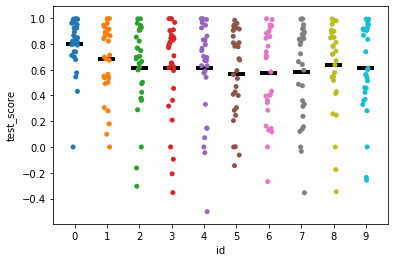

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

test_diff_list = []
for i in range(len(epoch_data_result)):
    epoch_data_result[i]['id'] = i
    entry = epoch_data_result[i]
    for j in range(len(entry['test_diff'])):
        test_diff_list.append({
            'id':i,
            'test_diff':entry['test_diff'][j],
            'test_score':entry['test_score'][j]
        })
                   
test_diff_list_cp=pd.DataFrame(test_diff_list) 


ax = sns.stripplot(x="id", y="test_score", data=test_diff_list_cp)

median_width = 0.4
group_median_val=[]

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    sample_name = int(text.get_text())  # "X" or "Y"

    # calculate the median value for all replicates of either X or Y
    #median_val = new_pd_result[(new_pd_result['lap']==0)&(new_pd_result['type']==sample_name)].predict_error.median()
    median_val = test_diff_list_cp[(test_diff_list_cp['id']==sample_name)].test_score.mean()
    group_median_val=np.append(group_median_val,median_val)
    # plot horizontal lines across the column, centered on the tick
    ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=4, color='k')
    
plt.show()
ax.figure.savefig('parameters_30.png')

In [9]:
#LSTM_model=fit_LSTM(X[6:-7,:,:],Y[6:-7,:],X_v, Y_valid,1)
root_dir = r'..\Neural_Decoding\training_models'
model_path = os.path.join(root_dir, 'ca3_group_params_test')
os.makedirs(root_dir, exist_ok=True)
for trial in range(3):
    for i in range(len(model_params)):
        cell_ratio=model_params[i]['cell_ratio']
        cell_num=int(np.ceil((X.shape[2])*cell_ratio))
        X_random,X_v_random,X_t_random=get_random_sample(X,X_v,X_t,cell_num)
        cur_m_p={'unit': model_params[i]['unit'], 'layer': model_params[i]['layer']}

        X_train_set = X_random[bins_before:-1-bins_after, :, :]
        Y_train_set = Y[bins_before:-1-bins_after, :]
        X_valid_set = X_v_random[bins_before:-1-bins_after, :, :]
        Y_valid_set = Y_valid[bins_before:-1-bins_after, :]
        X_test_set = X_t_random[bins_before:-1-bins_after, :, :]

        LSTM_model=fit_LSTM(X_train_set, Y_train_set, X_valid_set, Y_valid_set,100, model_path, 
                              cur_m_p,force=True)
        #y_valid_predicted=LSTM_model.predict(X_valid_set)
        #y_test_predicted=LSTM_model.predict(X_test_set)
        #y_train_predicted=LSTM_model.predict(X_train_set)

        #y_valid_pre_inverse=ohe.inverse_transform(y_valid_predicted)
        #y_test_pre_inverse=ohe.inverse_transform(y_test_predicted)

        lap_s_v,lap_d_t=compute_lap_score(X_v_random, valid_group_pos,LSTM_model,bins_before,bins_after)
        lap_s_test,lap_d_test=compute_lap_score(X_t_random, test_group_pos,LSTM_model,bins_before,bins_after)
        lap_s_train,lap_d_train=compute_lap_score(X_random, train_group_pos,LSTM_model,bins_before,bins_after)

        data_result.append(dict(v_score=lap_s_v, v_diff=lap_d_t,
                                test_score=lap_s_test, test_diff=lap_d_test,
                                train_score=lap_s_train, train_diff=lap_d_train,
                                **model_params[i]))
    
    

833
Train on 3599 samples, validate on 899 samples
Epoch 1/100
3599/3599 [==============================] - 45s 13ms/sample - loss: 0.0252 - accuracy: 0.4576
Epoch 2/100
3599/3599 [==============================] - 41s 11ms/sample - loss: 0.0150 - accuracy: 0.7477
Epoch 3/100
3599/3599 [==============================] - 40s 11ms/sample - loss: 0.0112 - accuracy: 0.8255
Epoch 4/100
3599/3599 [==============================] - 40s 11ms/sample - loss: 0.0088 - accuracy: 0.8547
Epoch 5/100
3599/3599 [==============================] - 36s 10ms/sample - loss: 0.0074 - accuracy: 0.8800
Epoch 6/100
3599/3599 [==============================] - 40s 11ms/sample - loss: 0.0066 - accuracy: 0.8914
Epoch 7/100
3599/3599 [==============================] - 40s 11ms/sample - loss: 0.0058 - accuracy: 0.9075
Epoch 8/100
3599/3599 [==============================] - 40s 11ms/sample - loss: 0.0053 - accuracy: 0.9200
Epoch 9/100
3599/3599 [==============================] - 40s 11ms/sample - loss: 0.0048 - acc

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

833
Train on 3599 samples, validate on 899 samples
Epoch 1/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0293 - accuracy: 0.4537
Epoch 2/100
3599/3599 [==============================] - 28s 8ms/sample - loss: 0.0159 - accuracy: 0.7369
Epoch 3/100
3599/3599 [==============================] - 28s 8ms/sample - loss: 0.0110 - accuracy: 0.8388
Epoch 4/100
3599/3599 [==============================] - 28s 8ms/sample - loss: 0.0086 - accuracy: 0.8727
Epoch 5/100
3599/3599 [==============================] - 28s 8ms/sample - loss: 0.0073 - accuracy: 0.8844
Epoch 6/100
3599/3599 [==============================] - 28s 8ms/sample - loss: 0.0065 - accuracy: 0.9050
Epoch 7/100
3599/3599 [==============================] - 28s 8ms/sample - loss: 0.0057 - accuracy: 0.9191
Epoch 8/100
3599/3599 [==============================] - 28s 8ms/sample - loss: 0.0051 - accuracy: 0.9269
Epoch 9/100
3599/3599 [==============================] - 28s 8ms/sample - loss: 0.0047 - accuracy: 0.

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

833
Train on 3599 samples, validate on 899 samples
Epoch 1/100
3599/3599 [==============================] - 13s 4ms/sample - loss: 0.0271 - accuracy: 0.4390
Epoch 2/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0170 - accuracy: 0.7035
Epoch 3/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0123 - accuracy: 0.8222
Epoch 4/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0093 - accuracy: 0.8616
Epoch 5/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0075 - accuracy: 0.8908
Epoch 6/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0065 - accuracy: 0.9091
Epoch 7/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0059 - accuracy: 0.9116
Epoch 8/100
3599/3599 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.92 - 12s 3ms/sample - loss: 0.0053 - accuracy: 0.9247
Epoch 9/100
3599/3599 [==============================] - 12

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

833
Train on 3599 samples, validate on 899 samples
Epoch 1/100
3599/3599 [==============================] - 24s 7ms/sample - loss: 0.0260 - accuracy: 0.4560
Epoch 2/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0152 - accuracy: 0.7419
Epoch 3/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0112 - accuracy: 0.8172
Epoch 4/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0088 - accuracy: 0.8530
Epoch 5/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0072 - accuracy: 0.8850
Epoch 6/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0064 - accuracy: 0.8922
Epoch 7/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0060 - accuracy: 0.9033
Epoch 8/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0053 - accuracy: 0.9136
Epoch 9/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0050 - accuracy: 0.

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


833
Train on 3599 samples, validate on 899 samples
Epoch 1/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0297 - accuracy: 0.4476
Epoch 2/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0159 - accuracy: 0.7352
Epoch 3/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0113 - accuracy: 0.8266
Epoch 4/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0087 - accuracy: 0.8647
Epoch 5/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0073 - accuracy: 0.8933
Epoch 6/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0063 - accuracy: 0.9041
Epoch 7/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0056 - accuracy: 0.9180
Epoch 8/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0052 - accuracy: 0.9300
Epoch 9/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0046 - accuracy: 0.

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

833
Train on 3599 samples, validate on 899 samples
Epoch 1/100
3599/3599 [==============================] - 13s 4ms/sample - loss: 0.0269 - accuracy: 0.4448
Epoch 2/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0169 - accuracy: 0.7113
Epoch 3/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0123 - accuracy: 0.8255
Epoch 4/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0093 - accuracy: 0.8686
Epoch 5/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0076 - accuracy: 0.8894
Epoch 6/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0067 - accuracy: 0.9014
Epoch 7/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0061 - accuracy: 0.9130
Epoch 8/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0054 - accuracy: 0.9269
Epoch 9/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0051 - accuracy: 0.

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

833
Train on 3599 samples, validate on 899 samples
Epoch 1/100
3599/3599 [==============================] - 24s 7ms/sample - loss: 0.0256 - accuracy: 0.4665
Epoch 2/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0152 - accuracy: 0.7485
Epoch 3/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0111 - accuracy: 0.8191
Epoch 4/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0087 - accuracy: 0.8580
Epoch 5/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0073 - accuracy: 0.8836
Epoch 6/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0065 - accuracy: 0.9019
Epoch 7/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0059 - accuracy: 0.9044
Epoch 8/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0053 - accuracy: 0.9169
Epoch 9/100
3599/3599 [==============================] - 23s 6ms/sample - loss: 0.0048 - accuracy: 0.

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

833
Train on 3599 samples, validate on 899 samples
Epoch 1/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0310 - accuracy: 0.4398
Epoch 2/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0160 - accuracy: 0.7244
Epoch 3/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0112 - accuracy: 0.8261
Epoch 4/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0088 - accuracy: 0.8600
Epoch 5/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0072 - accuracy: 0.8936
Epoch 6/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0064 - accuracy: 0.9053
Epoch 7/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0057 - accuracy: 0.9164
Epoch 8/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0051 - accuracy: 0.9289
Epoch 9/100
3599/3599 [==============================] - 29s 8ms/sample - loss: 0.0047 - accuracy: 0.

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

833
Train on 3599 samples, validate on 899 samples
Epoch 1/100
3599/3599 [==============================] - 13s 4ms/sample - loss: 0.0268 - accuracy: 0.4346
Epoch 2/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0170 - accuracy: 0.7013
Epoch 3/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0124 - accuracy: 0.8174
Epoch 4/100
3599/3599 [==============================] - 13s 4ms/sample - loss: 0.0095 - accuracy: 0.8625
Epoch 5/100
3599/3599 [==============================] - 13s 4ms/sample - loss: 0.0075 - accuracy: 0.8855
Epoch 6/100
3599/3599 [==============================] - 13s 4ms/sample - loss: 0.0064 - accuracy: 0.9072
Epoch 7/100
3599/3599 [==============================] - 13s 4ms/sample - loss: 0.0059 - accuracy: 0.9208
Epoch 8/100
3599/3599 [==============================] - 13s 4ms/sample - loss: 0.0053 - accuracy: 0.9264
Epoch 9/100
3599/3599 [==============================] - 12s 3ms/sample - loss: 0.0049 - accuracy: 0.

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

In [10]:
#LSTM_model=fit_LSTM(X[6:-7,:,:],Y[6:-7,:],X_v, Y_valid,1)
root_dir = r'..\Neural_Decoding\training_models'
model_path = os.path.join(root_dir, 'ca3_group_params_test')
os.makedirs(root_dir, exist_ok=True)
for i in range(len(model_params)):
    cell_ratio=model_params[i]['cell_ratio']
    cell_num=int(np.ceil((X.shape[2])*cell_ratio))
    X_random,X_v_random,X_t_random=get_random_sample(X,X_v,X_t,cell_num)
    cur_m_p={'unit': model_params[i]['unit'], 'layer': model_params[i]['layer']}
    
    X_train_set = X_random[bins_before:-1-bins_after, :, :]
    Y_train_set = Y[bins_before:-1-bins_after, :]
    X_valid_set = X_v_random[bins_before:-1-bins_after, :, :]
    Y_valid_set = Y_valid[bins_before:-1-bins_after, :]
    X_test_set = X_t_random[bins_before:-1-bins_after, :, :]
    
    LSTM_model=fit_LSTM(X_train_set, Y_train_set, X_valid_set, Y_valid_set,50, model_path, 
                          cur_m_p,force=True)
    #y_valid_predicted=LSTM_model.predict(X_valid_set)
    #y_test_predicted=LSTM_model.predict(X_test_set)
    #y_train_predicted=LSTM_model.predict(X_train_set)
    
    #y_valid_pre_inverse=ohe.inverse_transform(y_valid_predicted)
    #y_test_pre_inverse=ohe.inverse_transform(y_test_predicted)
    
    lap_s_v,lap_d_t=compute_lap_score(X_v_random, y_valid,LSTM_model,bins_before,bins_after)
    lap_s_test,lap_d_test=compute_lap_score(X_t_random, y_test,LSTM_model,bins_before,bins_after)
    lap_s_train,lap_d_train=compute_lap_score(X_random, y_train,LSTM_model,bins_before,bins_after)
    
    data_result.append(dict(v_score=lap_s_v, v_diff=lap_d_t,
                            test_score=lap_s_test, test_diff=lap_d_test,
                            train_score=lap_s_train, train_diff=lap_d_train,
                            **model_params[i]))
    
    

173
Train on 4064 samples, validate on 891 samples
Epoch 1/50
4064/4064 [==============================] - 1s 237us/sample - loss: 0.0280 - accuracy: 0.3413
Epoch 2/50
4064/4064 [==============================] - 1s 162us/sample - loss: 0.0215 - accuracy: 0.4953
Epoch 3/50
4064/4064 [==============================] - 1s 160us/sample - loss: 0.0197 - accuracy: 0.5541
Epoch 4/50
4064/4064 [==============================] - 1s 162us/sample - loss: 0.0185 - accuracy: 0.5876
Epoch 5/50
4064/4064 [==============================] - 1s 162us/sample - loss: 0.0177 - accuracy: 0.6149
Epoch 6/50
4064/4064 [==============================] - 1s 160us/sample - loss: 0.0170 - accuracy: 0.6363
Epoch 7/50
4064/4064 [==============================] - 1s 169us/sample - loss: 0.0164 - accuracy: 0.6550
Epoch 8/50
4064/4064 [==============================] - 1s 160us/sample - loss: 0.0159 - accuracy: 0.6656
Epoch 9/50
4064/4064 [==============================] - 1s 161us/sample - loss: 0.0154 - accuracy: 0.

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\can\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

In [ ]:
LSTM_model=tf.keras.models.load_model(model_path)

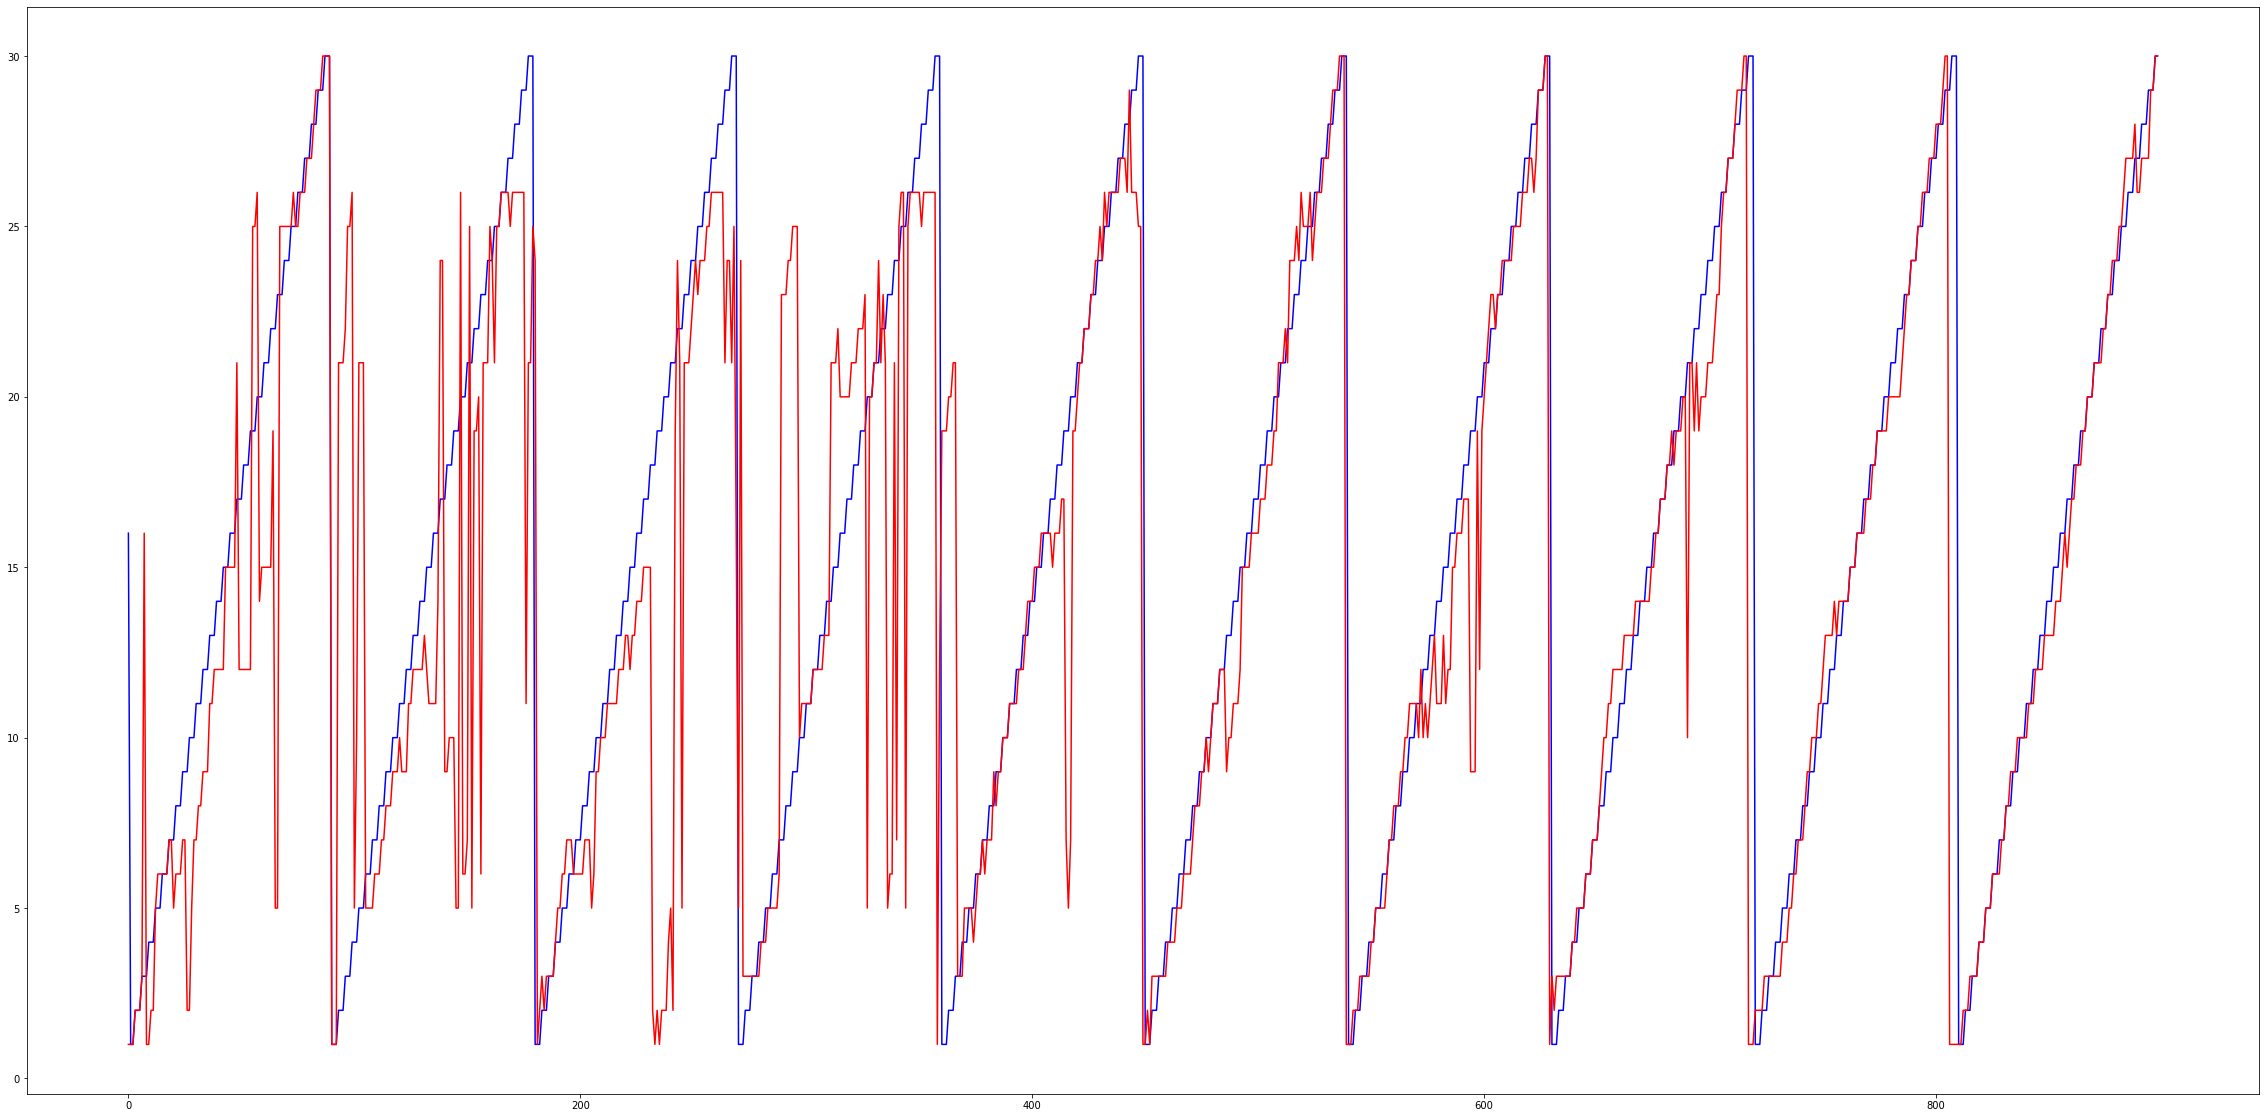

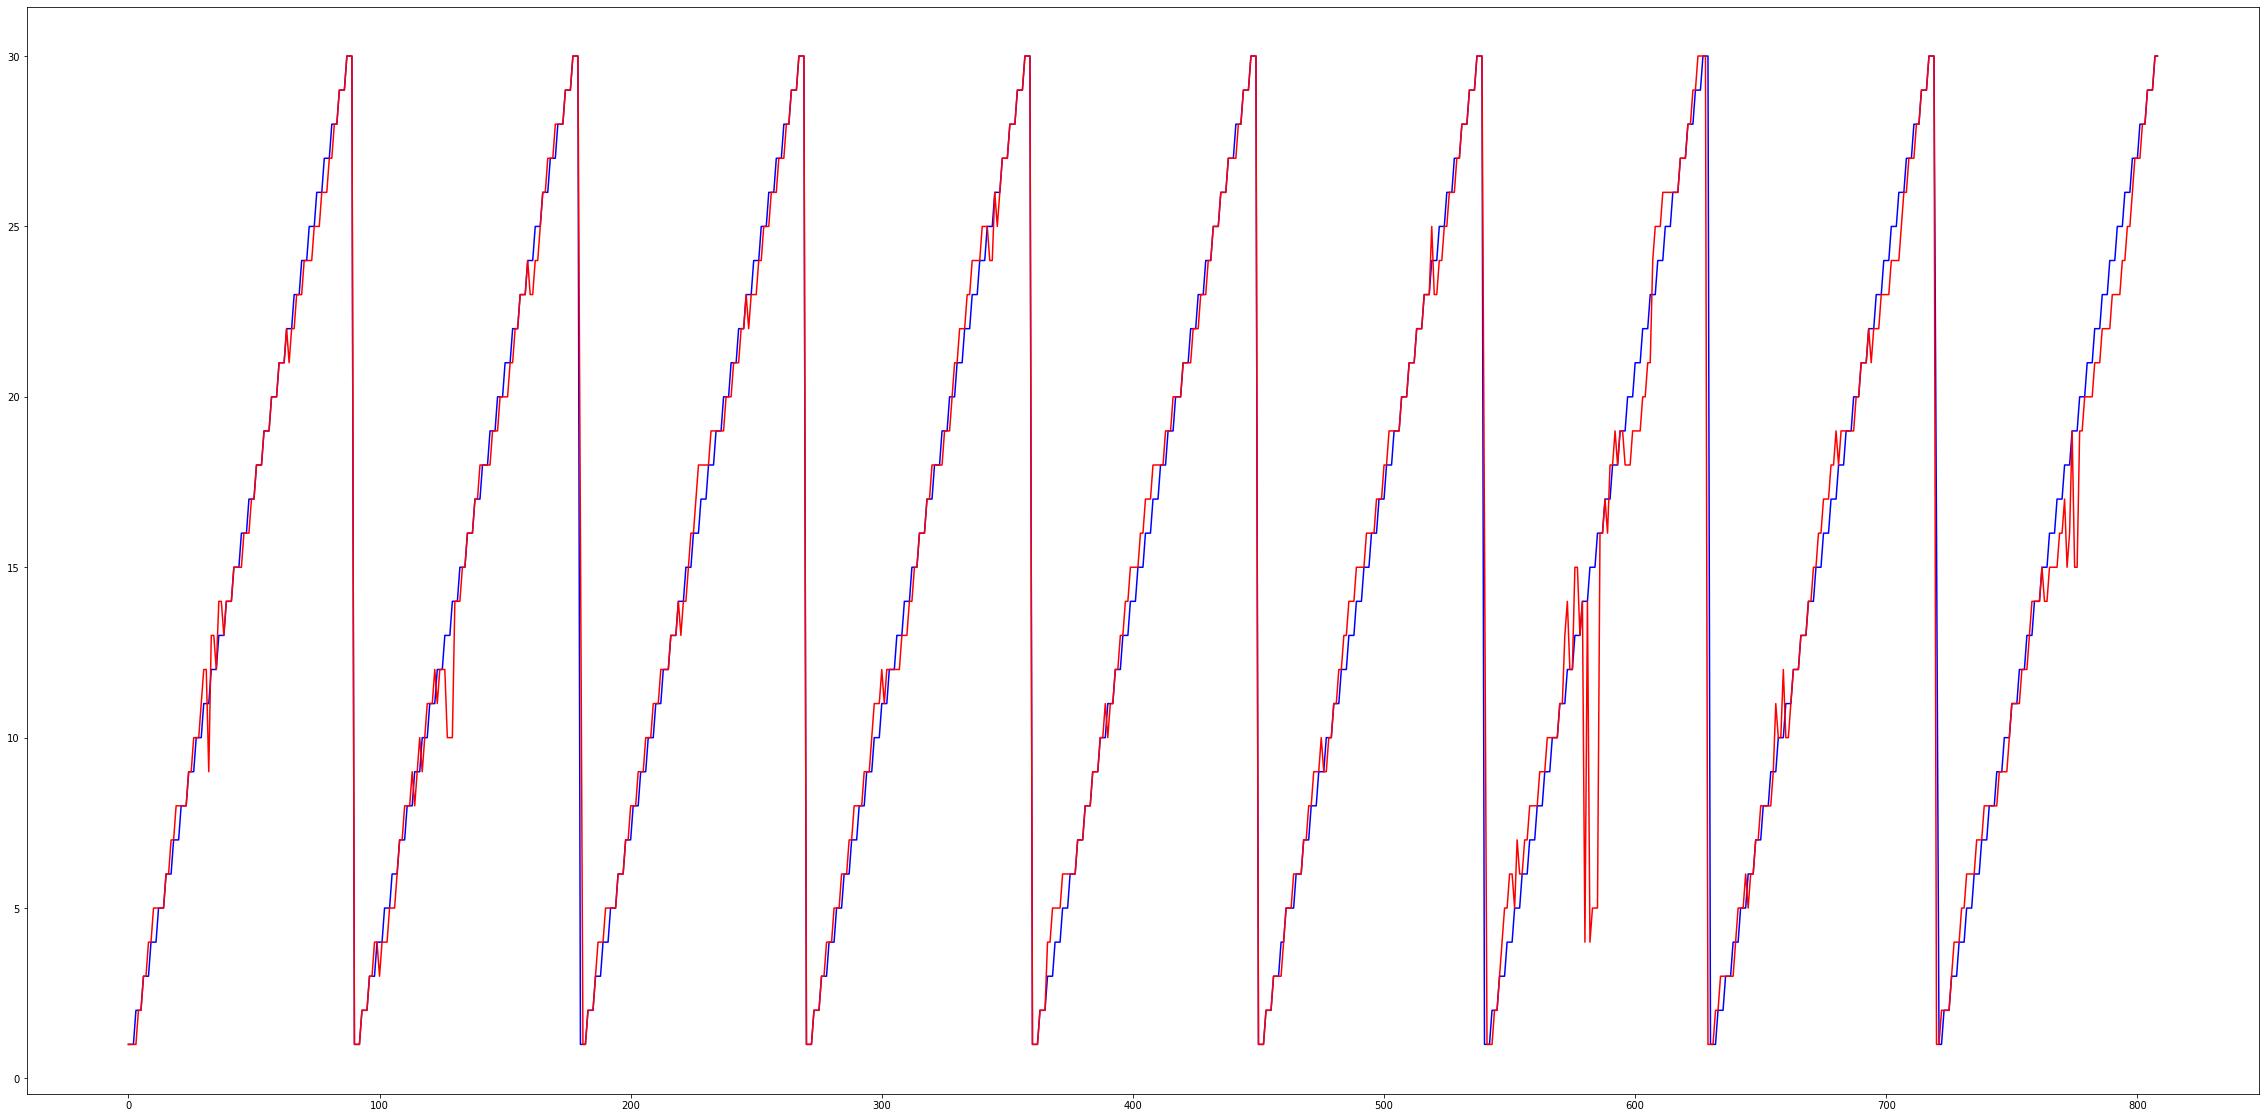

In [12]:
# y_valid_predicted=LSTM_model.predict(X_v[6:-7,:,:])
# y_test_predicted=LSTM_model.predict(X_t[6:-7,:,:])
# y_train_predicted=LSTM_model.predict(X[6:-7,:,:])
y_valid_predicted=LSTM_model.predict(X_valid_set)
y_test_predicted=LSTM_model.predict(X_test_set)
#y_train_predicted=LSTM_model.predict(X_train_set)
y_test_pre_inverse=ohe.inverse_transform(y_test_predicted)
y_valid_pre_inverse=ohe.inverse_transform(y_valid_predicted)
#print(y_valid_predict_inverse)
plt.figure(figsize=(40,20))
plt.plot(test_group_pos[6:-7],'b')
plt.plot(y_test_pre_inverse[:],'r')
plt.figure(figsize=(40,20))
plt.plot(valid_group_pos[6:-7],'b')
plt.plot(y_valid_pre_inverse[:],'r')

In [10]:
new_result = pd.DataFrame(data_result)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
new_data_result=data_result.copy()

In [13]:
test_diff_list = []
for i in range(len(data_result)):
    new_data_result[i]['id'] = i
    entry = new_data_result[i]
    for j in range(len(entry['test_diff'])):
        test_diff_list.append({
            'id':i,
            'test_diff':entry['test_diff'][j],
            'test_score':entry['test_score'][j]
        })
                   
test_diff_list_cp=pd.DataFrame(test_diff_list)    

In [20]:
import pickle
f = open("file.pkl","wb")
pickle.dump(new_data_result,f)
output = open('CA3_n2n_parameters.pkl', 'wb')
pickle.dump(new_data_result, output)
output.close()


In [25]:
pkl_file = open('CA3_n2n_parameters.pkl', 'rb')
mydict2 = pickle.load(pkl_file)
pkl_file.close()
print(mydict2[0]['v_score'])

[0.9963564  0.99730691 0.99762374 0.99524748 0.99556432 0.99714849
 0.99714849 0.99746532 0.99142405 0.        ]


test_diff_list_cp=pd.DataFrame(test_diff_list)
test_diff_list_cp

new_result_cp = pd.DataFrame(new_data_result)
new_result_cp

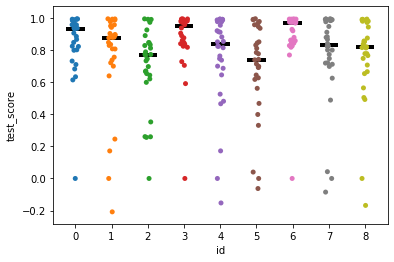

In [16]:
ax = sns.stripplot(x="id", y="test_score", data=test_diff_list_cp)

median_width = 0.4
group_median_val=[]

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    sample_name = int(text.get_text())  # "X" or "Y"

    # calculate the median value for all replicates of either X or Y
    #median_val = new_pd_result[(new_pd_result['lap']==0)&(new_pd_result['type']==sample_name)].predict_error.median()
    median_val = test_diff_list_cp[(test_diff_list_cp['id']==sample_name)].test_score.median()
    group_median_val=np.append(group_median_val,median_val)
    # plot horizontal lines across the column, centered on the tick
    ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=4, color='k')
    
plt.show()

[0.95195694 0.85095507 0.77850626]


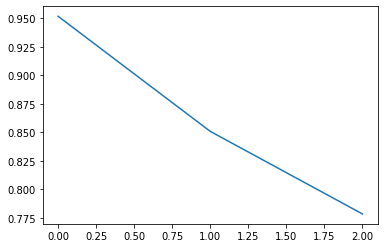

In [17]:
#print(group_median_val)
#print(np.reshape(group_median_val, (2,-1)))
A=np.mean(np.reshape(group_median_val, (3,-1)),axis=0)
print(A)
plt.figure
plt.plot(A)

[ 0.01583114 -0.0397122   0.12545691  0.04795211  0.09227876  0.10075738
 -0.06789452 -0.01573621 -0.11269116]


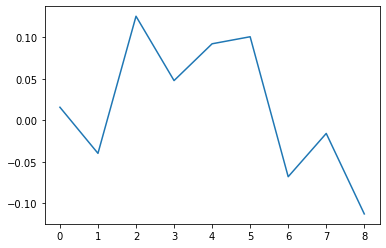

In [16]:
#print(group_median_val)
#print(np.reshape(group_median_val, (2,-1)))
A=np.mean(np.reshape(group_median_val, (3,-1)),axis=0)
print(A)
plt.figure
plt.plot(A)

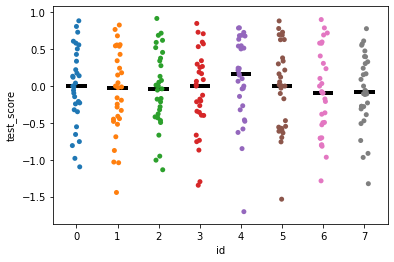

In [11]:
ax = sns.stripplot(x="id", y="test_score", data=test_diff_list_cp)

median_width = 0.4

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    sample_name = int(text.get_text())  # "X" or "Y"

    # calculate the median value for all replicates of either X or Y
    #median_val = new_pd_result[(new_pd_result['lap']==0)&(new_pd_result['type']==sample_name)].predict_error.median()
    median_val = test_diff_list_cp[(test_diff_list_cp['id']==sample_name)].test_score.median()
    # plot horizontal lines across the column, centered on the tick
    ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=4, color='k')
    
plt.show()

In [78]:
np.save('para_test1.npy', new_data_result) # save

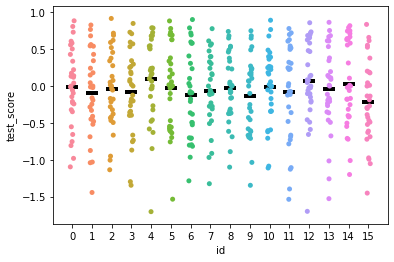

In [19]:
#CA3_score= np.load('para_test1.npy')
test_diff_list2 = []
for i in range(len(data_result)):
    new_data_result[i]['id'] = i
    entry = new_data_result[i]
    for j in range(len(entry['test_diff'])):
        test_diff_list2.append({
            'id':i,
            'test_diff':entry['test_diff'][j],
            'test_score':entry['test_score'][j]
        })
test_diff_list2_cp=pd.DataFrame(test_diff_list2)

ax = sns.stripplot(x="id", y="test_score", data=test_diff_list2_cp)

median_width = 0.4

for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
    sample_name = int(text.get_text())  # "X" or "Y"

    # calculate the median value for all replicates of either X or Y
    #median_val = new_pd_result[(new_pd_result['lap']==0)&(new_pd_result['type']==sample_name)].predict_error.median()
    median_val = test_diff_list2_cp[(test_diff_list2_cp['id']==sample_name)].test_score.mean()
    # plot horizontal lines across the column, centered on the tick
    ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=4, color='k')
    
plt.show()